<a href="https://colab.research.google.com/github/AnnayanB/CustomerSegmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project_Annayan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
df=pd.read_excel('/content/drive/MyDrive/Almabetter_Capstone/CustomerSegmentation_Annayan/Online Retail.xlsx')

In [ ]:
df.shape

(541909, 8)

In [ ]:
# First glance at the dataset.
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


#**Check for duplicate rows**

In [ ]:
# Check any duplicate rows
len(df[df.duplicated()])

5268

**So we have a total of 5268 duplicate rows. So we will drop all the duplicate rows.**

In [ ]:
#Keep the first occurrencre of any row in the dataset and remove all of its duplicate.
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.shape

(536641, 8)

#**Checking null values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


**We have two columns - Description, CustomerID which are having null values. We will drop all the rows having null values since imputing the CustomerID column can alter our dataset.**

In [ ]:
df.dropna(inplace=True)

In [ ]:
#No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


#**Dropping cancelled Invoices**

**Since we have some invoice's for cancelled orders as well (indicated by invoive starting with C), we will remove all such datapoints.**

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df.shape

(392732, 8)

#**Exploratory Data Analysis**

## **EDA On Country**

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
df['Country'].value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country','Country':'Count'}, inplace=True)
country_df

,Country,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1453
9,Australia,1184


**Top 5 countries -**

In [ ]:
country_df.head()

,Country,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


**Bottom 5 countries -**

In [ ]:
country_df.tail()

,Country,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


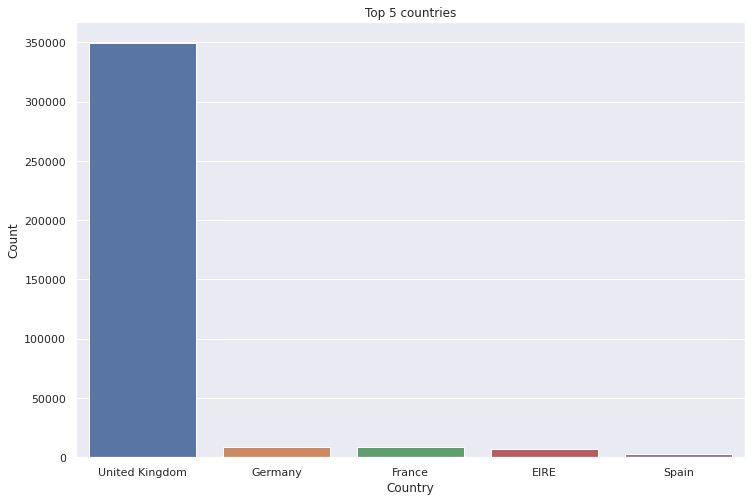

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 5 countries')
sns.barplot(x='Country',y='Count',data=country_df[0:5])

**Top 5 countries are -** 

**1) United Kingdom**

**2) Germany** 

**3) France** 

**4) Ireland**

**5) Spain**

**Majority of the customers are from UK itself.**


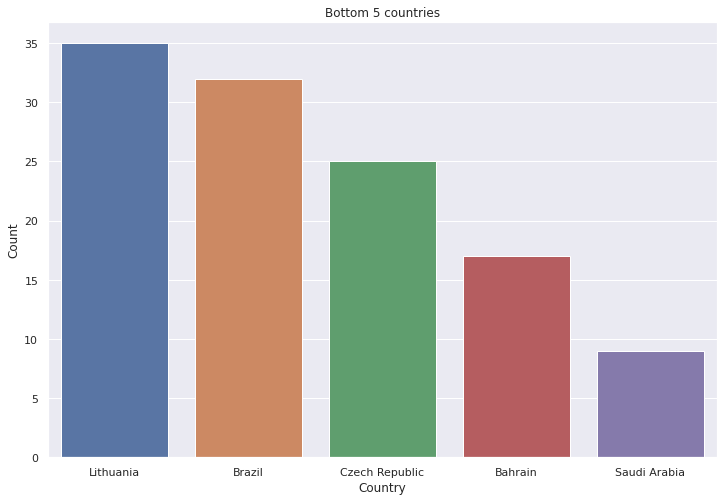

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Bottom 5 countries')
sns.barplot(x='Country',y='Count',data=country_df[-5:])

**Bottom 5 countries are-**

**1) Saudi Arabia**

**2) Bahrain**

**3) Czech Republic** 

**4) Brazil**

**5) Lithuania**

## **EDA On Product Description**

In [ ]:
df_desc=df['Description'].value_counts().reset_index()
df_desc.rename(columns={'index':'Product Description','Description':'Count'},inplace=True)
df_desc

,Product Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390
...,...,...
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1


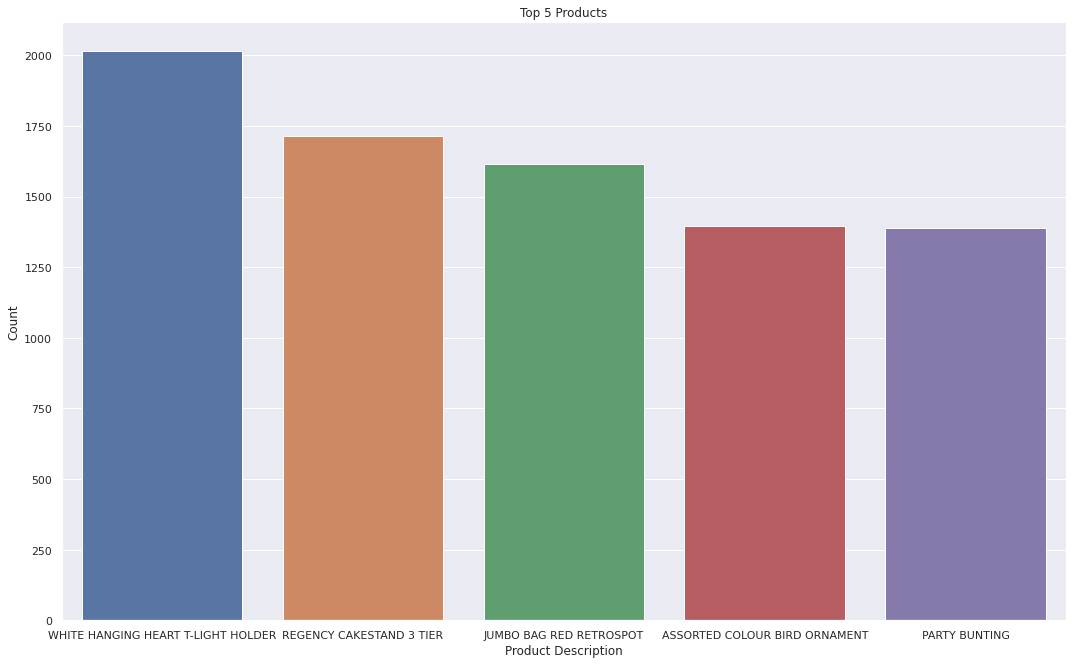

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Products')
sns.barplot(x='Product Description',y='Count',data=df_desc[0:5])

**Top 5 products sold are-**

**1) White Hanging Heart T-Light Holder**

**2) Regency Cakestand 3 Tier**

**3) Jumbo Bag Red Retrospot** 

**4) Assorted Colour Bird Ornament**

**5) Party Bunting**

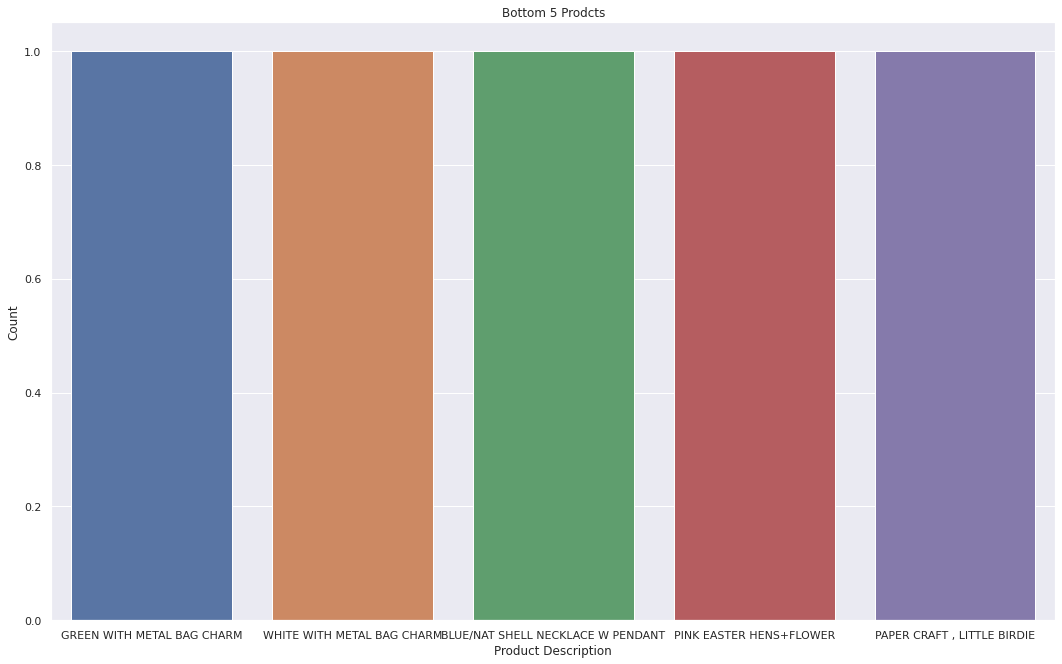

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 Prodcts')
sns.barplot(x='Product Description',y='Count',data=df_desc[-5:])

**5 least sold products are -**

**1) Green with Metal Bag Charm**

**2) White with Metal Bag Charm**

**3) Blue/NAT Shell Necklace W Pendant**

**4) Pink Easter Hens+Flower**

**5) Paper Craft, Little Birdie**

# **EDA On Product sold based on quantity**

In [ ]:
df_qty=df.groupby('Description')['Quantity'].sum().sort_values().reset_index()
df_qty

,Description,Quantity
0,BLOSSOM IMAGES SCRAP BOOK SET,1
1,PACK 4 FLOWER/BUTTERFLY PATCHES,1
2,BLACK DROP EARRINGS W LONG BEADS,1
3,VINTAGE BEAD PINK JEWEL STAND,1
4,SET/3 FLORAL GARDEN TOOLS IN BAG,1
...,...,...
3872,WHITE HANGING HEART T-LIGHT HOLDER,36706
3873,JUMBO BAG RED RETROSPOT,46078
3874,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3875,MEDIUM CERAMIC TOP STORAGE JAR,77916


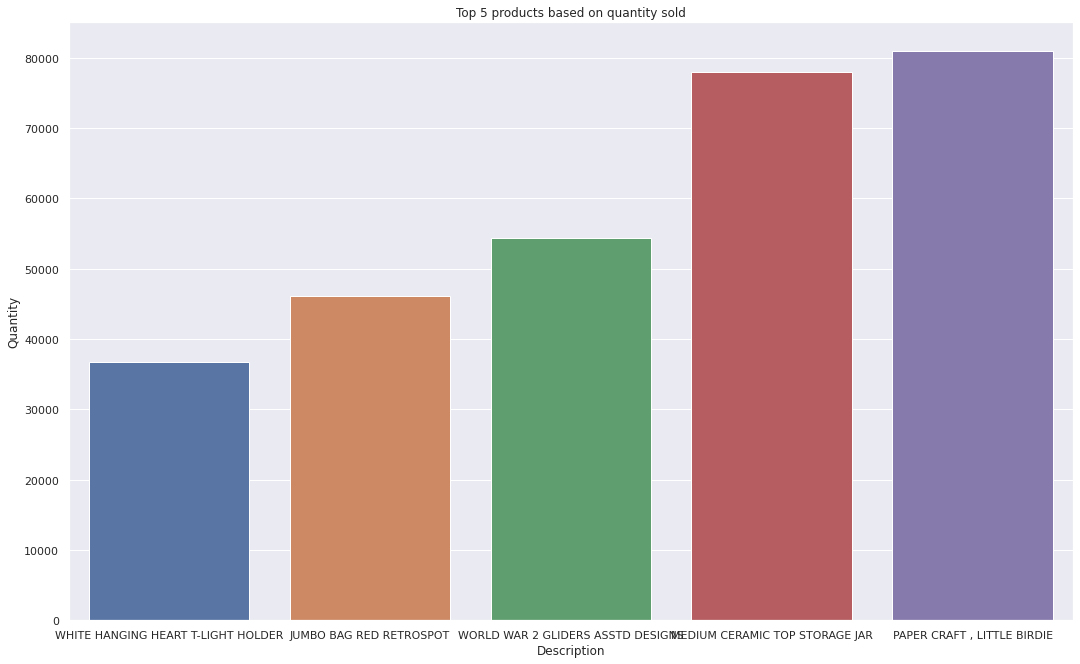

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Top 5 products based on quantity sold')
sns.barplot(x='Description',y='Quantity',data=df_qty[-5:])

**Top 5 products sold based on quantity are -**

**1) Paper Craft, Little Birdie**

**2) Medium Ceramic Top Storage Jar**

**3) World War 2 Gliders Asstd Design**

**4) Jumbo Bag Red Retrospot**

**5) White Hanging Heart T-Light Holder**

**So the list of products sold based on description and and the list of product sold based on quantity differs. This means that their are some of the goods which are sold in large quantities but less frequently.**

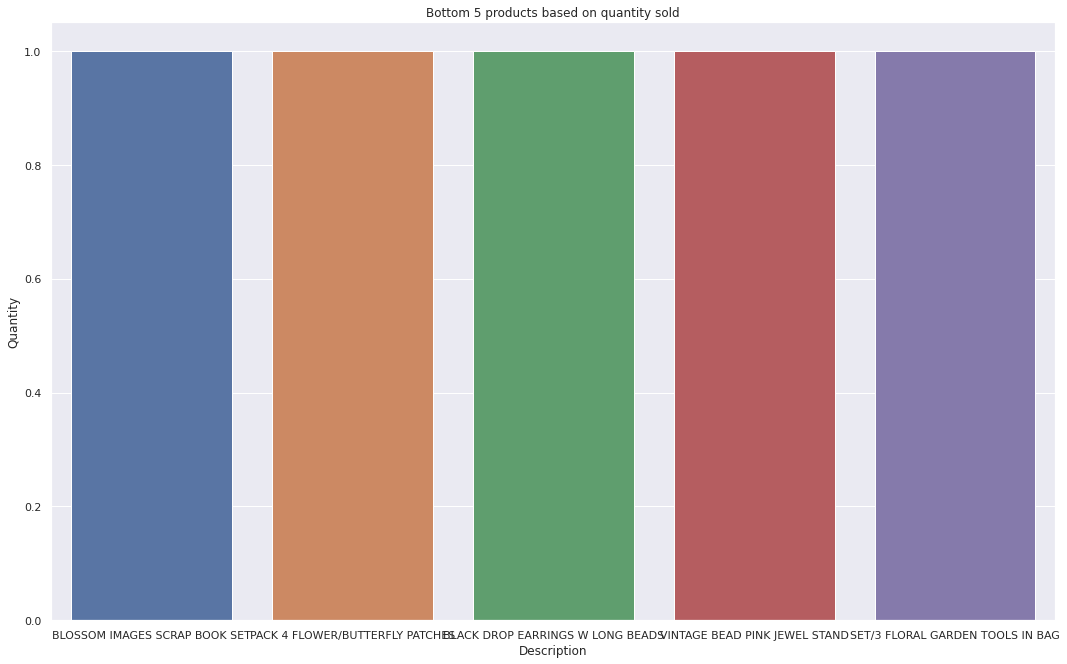

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 products based on quantity sold')
sns.barplot(x='Description',y='Quantity',data=df_qty[0:5])

  **Bottom 5 products sold based on quantity-**

  **1) Blossoms Images Scrap Book** 

  **2) Setpack 4 Flower/Butterfly Patches**

  **3) Black Drop Earrings W Long Beads**

  **4) Vintage Bead Pink Jewel Standset**

  **5) Floral Garden Tools In Bag**

## **EDA On Quantity**

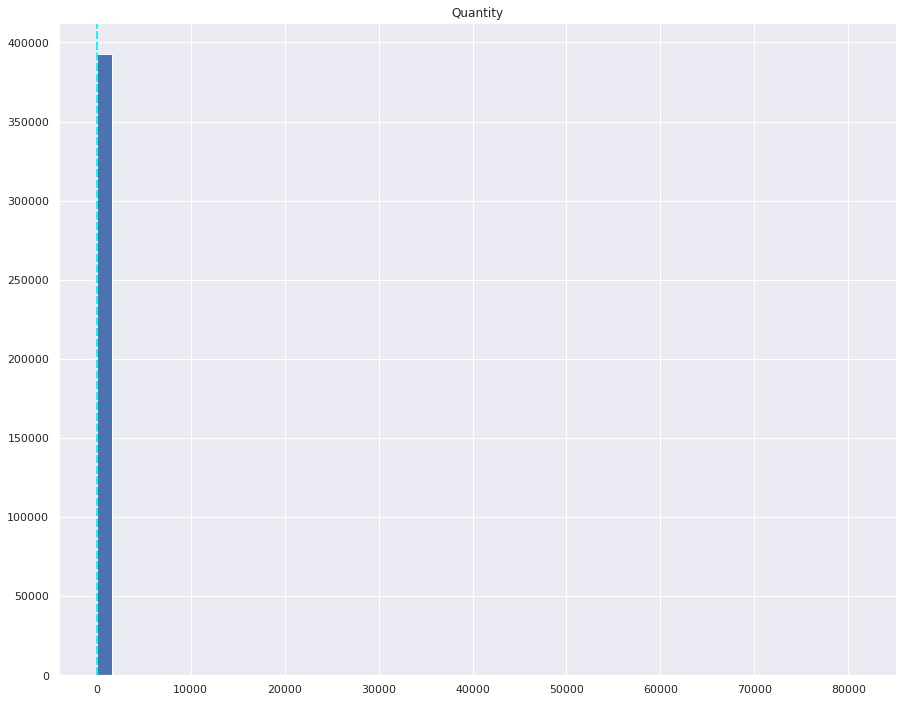

In [ ]:
fig = plt.figure(figsize=(15, 12))
ax = fig.gca()
feature = df['Quantity']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Quantity')
plt.show()

**Log transformed distribution of Quantity**

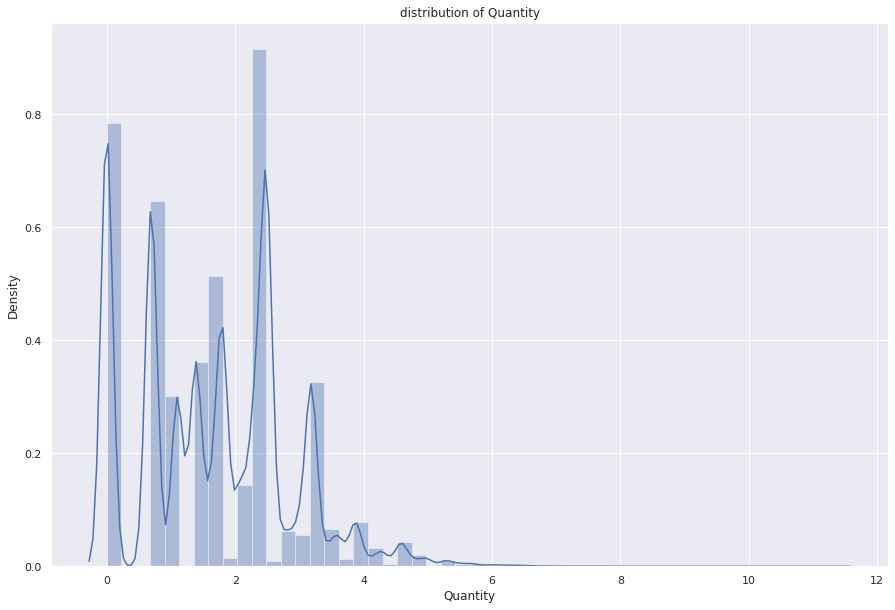

In [ ]:
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

## **EDA On Unitprice**

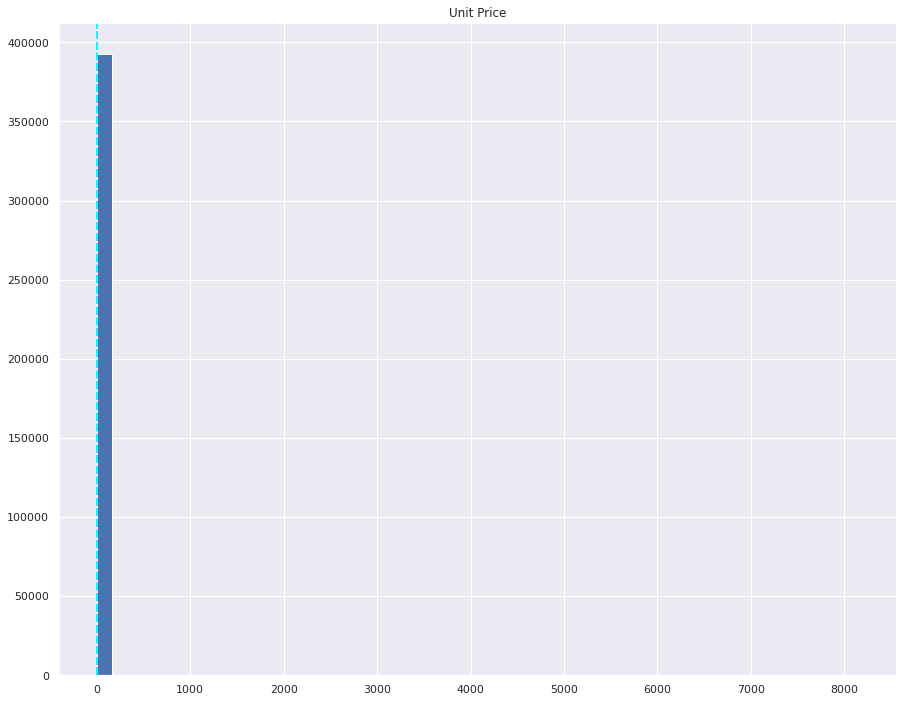

In [ ]:
fig = plt.figure(figsize=(15, 12))
ax = fig.gca()
feature = df['UnitPrice']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Unit Price')
plt.show()

**Log Transformed distribution of UnitPrice**

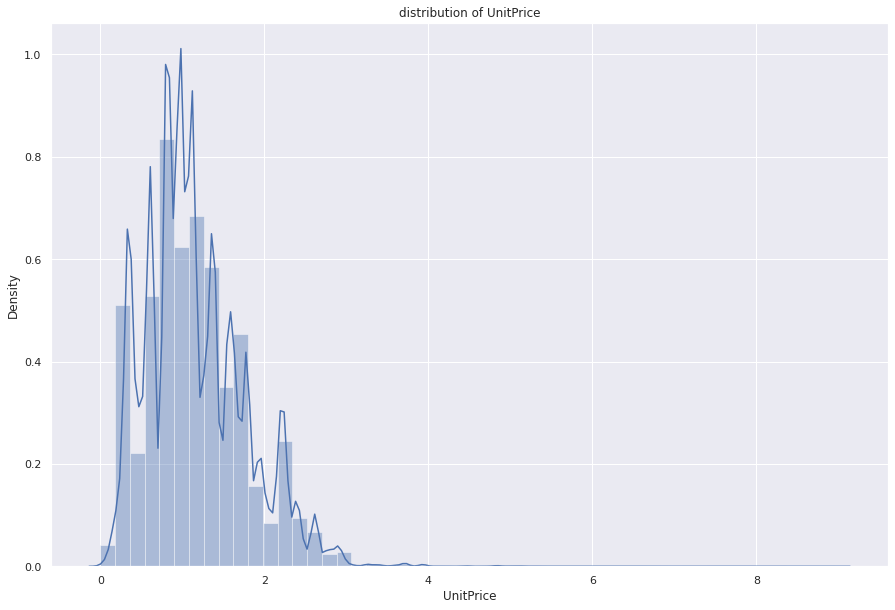

In [ ]:
plt.figure(figsize=(15,10))
plt.title('distribution of UnitPrice')
sns.distplot(np.log(df['UnitPrice']+1),color="B")

**We have some of the datapoints where unitprice is 0 which doesn't make sense in real life. So we will exclude these datapoints from our analysis.**

In [ ]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [ ]:
df=df[df['UnitPrice']>0]

In [ ]:
df.shape

(392692, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#**Feature Engineering**

**Converting InvoiceDate to dateTime object and then extracting Year, Month, Day, Hour, Minute, DayName and MonthName out of it.**

In [ ]:
df['Date'] =  pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute
df['DayName']=df['InvoiceDate'].dt.day_name()
df['MonthName']=df['InvoiceDate'].dt.month_name()

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Hour,Minute,DayName,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,2010,12,1,8,28,Wednesday,December
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,2010,12,1,8,28,Wednesday,December
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,2010,12,1,8,34,Wednesday,December


**UnitPrice and Quantity columns can be multiplied to create a new 'Amount' column which reflects the total amount paid by the customer in that particular transaction.**

In [ ]:
df['Amount']=df['UnitPrice']*df['Quantity']

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Hour,Minute,DayName,MonthName,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,26,Wednesday,December,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,2010,12,1,8,28,Wednesday,December,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,2010,12,1,8,28,Wednesday,December,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,2010,12,1,8,34,Wednesday,December,54.08


## **Monthwise sales of products**

In [ ]:
df_month=df.groupby('MonthName')['Amount'].sum().sort_values().reset_index()
df_month

,MonthName,Amount
0,February,446084.920
1,April,468374.331
2,January,568101.310
3,March,594081.760
4,July,598962.901
5,August,644051.040
6,June,660046.050
7,May,677355.150
8,September,950690.202
9,October,1035642.450


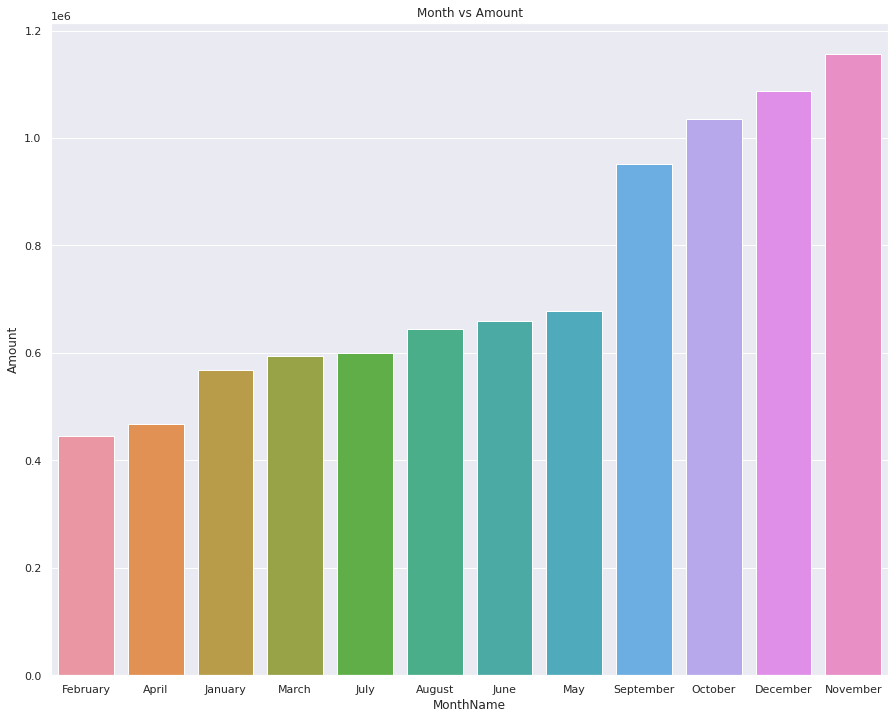

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Month vs Amount')
sns.barplot(x='MonthName',y='Amount',data=df_month)

**Top 3 months based on the sale amount are - November, December and October. Hence we can say that most of the sale happened at the end of the year.**

## **Weekly Sales**

In [ ]:
df_day=df.groupby('DayName')['Amount'].sum().sort_values().reset_index()
df_day

,DayName,Amount
0,Sunday,785490.321
1,Monday,1363604.401
2,Friday,1483080.811
3,Wednesday,1584283.830
4,Tuesday,1697733.801
5,Thursday,1973015.730


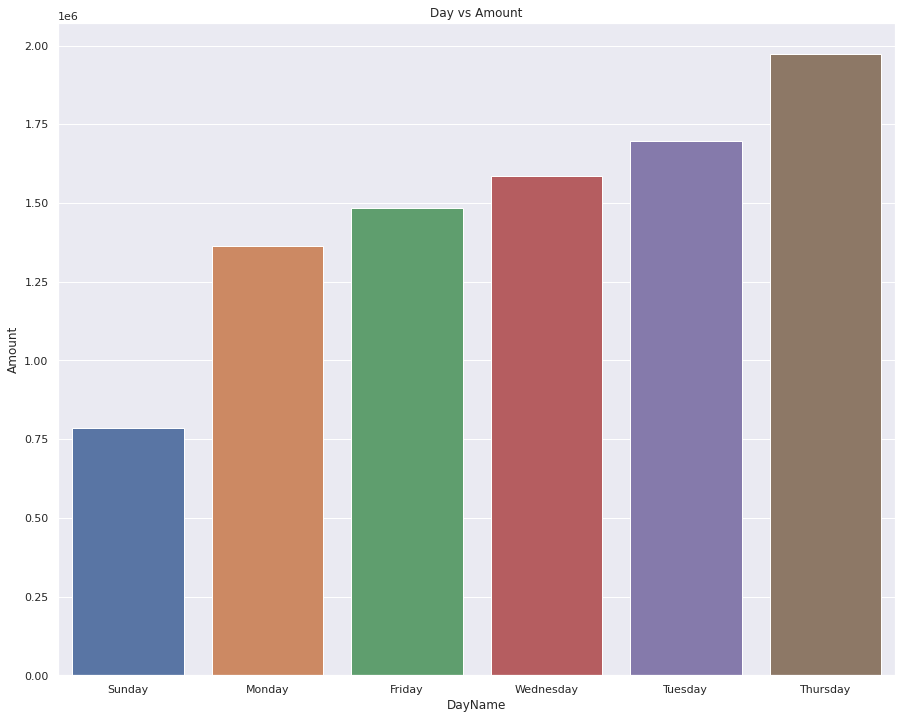

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Day vs Amount')
sns.barplot(x='DayName',y='Amount',data=df_day)

**Top 3 days based on sale amount are - Thursday, Tuesday and Wednesday.**

**Least sale happened on Sundays.** 

**On Mondays we can see a sudden increase in sales.** 

**People tend to buy more during Mid week - Tuesday to Thursday.**

## **Hourwise Sales**

In [ ]:
df_hour=df.groupby('Hour')['Amount'].sum().reset_index()
df_hour.sort_values(by ='Hour')

,Hour,Amount
0,6,4.250
1,7,31059.210
2,8,281997.790
3,9,842392.341
4,10,1259267.591
5,11,1101177.600
6,12,1373695.390
7,13,1168724.200
8,14,991992.821
9,15,963559.680


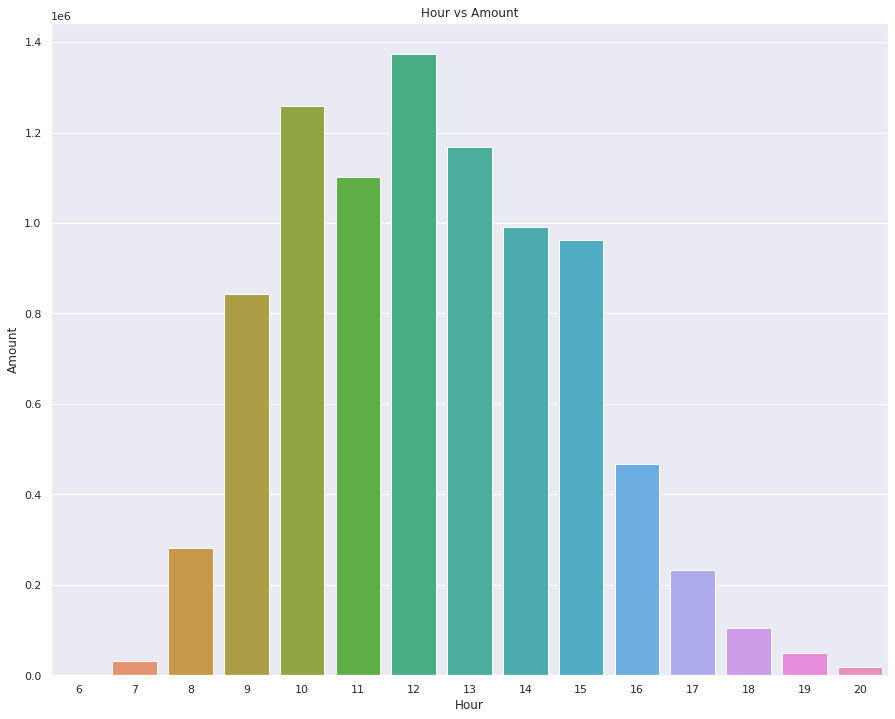

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Hour vs Amount')
sns.barplot(x='Hour',y='Amount',data=df_hour)

**Based on the above barplot, we can say that -**

**Sale starts increasing from the morning hours, it peaks in the afternoon and then declines in the evening.**

**Sudden increase in sale at 9 and 10 AM. There is a dip in sales at 11 AM.**

**Sales peak at 12 PM and then it starts declining.**

**10 AM - 3 PM is the prime time for sales.**

#**RFM model (Recency, Frequency, Monetary value)**

**Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on.**

**Checking the most recent date on which purchase was done**

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

**Most recent date on which purchase was done -> 9th Decemember 2011.**

In [ ]:
import datetime as dt
Latest_date=dt.datetime(2011,12,10)

**Setting the latest date as one day after the last purchase was done -> 10th December 2011.**

**Calculating recency, frequency and monetary value for each customer.**

**Recency -> Latest date - Last Invoice date of each customer**

**Frequency -> Count of the number of invoices for each customer**

**Monetary -> Total Amount for each customer**

In [ ]:
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Amount': lambda x: x.sum()})
rfm_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Amount':'Monetary'},inplace=True)

In [ ]:
rfm_df.shape

(4338, 3)

In [ ]:
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


In [ ]:
rfm_df.tail(10)

,Recency,Frequency,Monetary
CustomerID,,,
18273.0,2,3,204.00
18274.0,30,11,175.92
18276.0,43,14,335.86
18277.0,58,8,110.38
18278.0,73,9,173.90
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05
18283.0,3,721,2045.53


**Customers having low recency, high frequency and high monetary value are the best customers.**

## **Summary Statistics and plot distribution of recency column**

In [ ]:
rfm_df['Recency'].describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

**Average recency is 92 days and max recency is 373 days.**

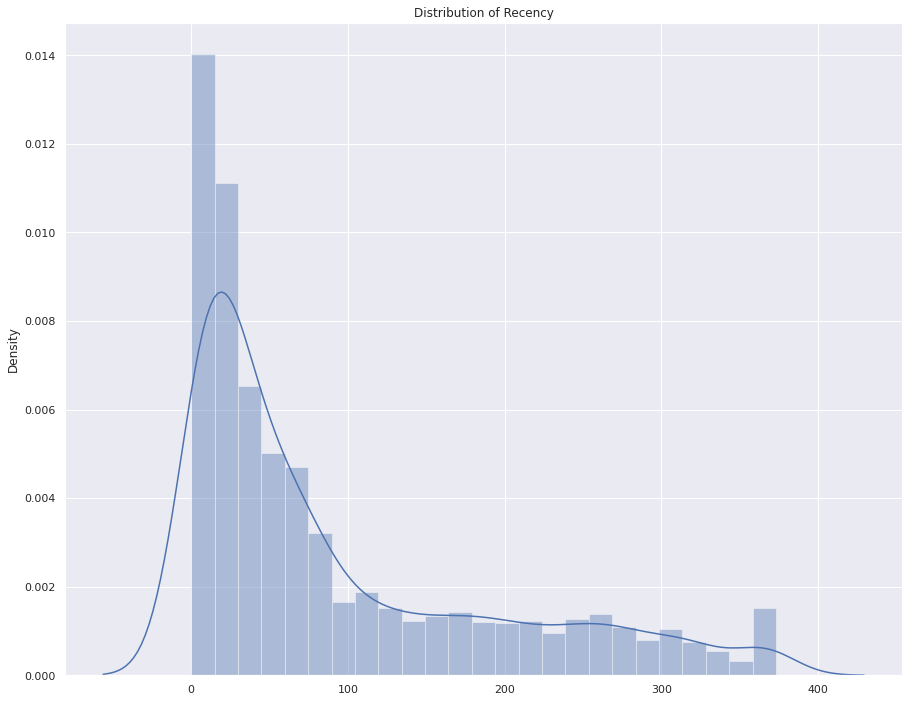

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Distribution of Recency')
sns.distplot(x=rfm_df['Recency'],color='B')

**We can see a positively skewed distribution for recency. Most of the customers have recency of 90 days i.e. 3 months.**

## **Summary Statistics and plot distribution of frequency column**

In [ ]:
rfm_df['Frequency'].describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

**Average frequency of customers purchasing from the site is 90 times.**

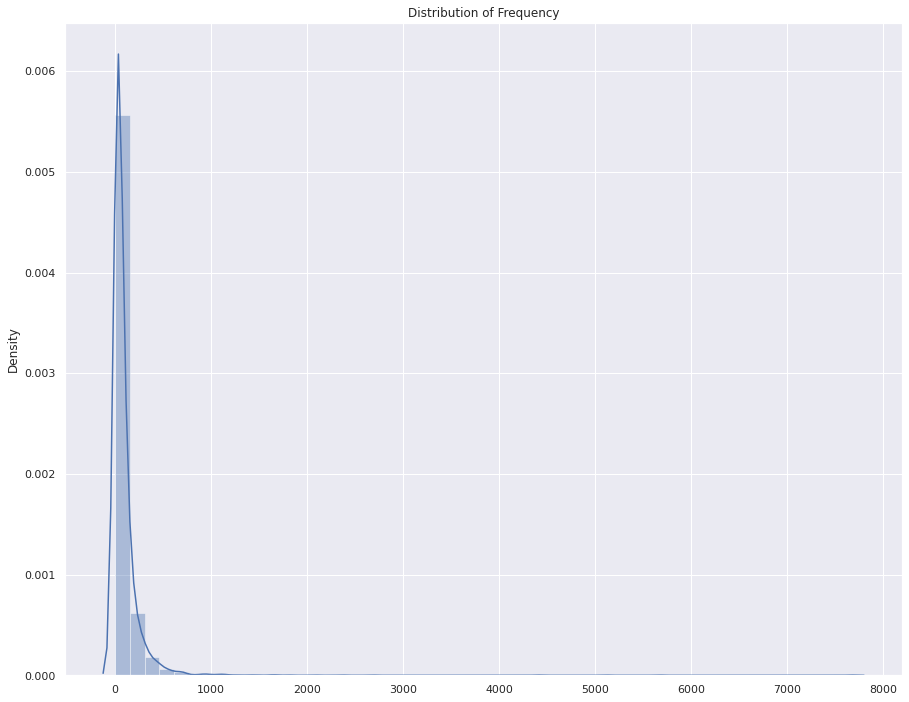

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Distribution of Frequency')
sns.distplot(x=rfm_df['Frequency'],color='B')

**We can see a positively skewed distribution for frequency. Most of the customers have a frequency b/w 50 to 100.**

## **Summary Statistics and plot distribution of Monetary column**

In [ ]:
rfm_df['Monetary'].describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

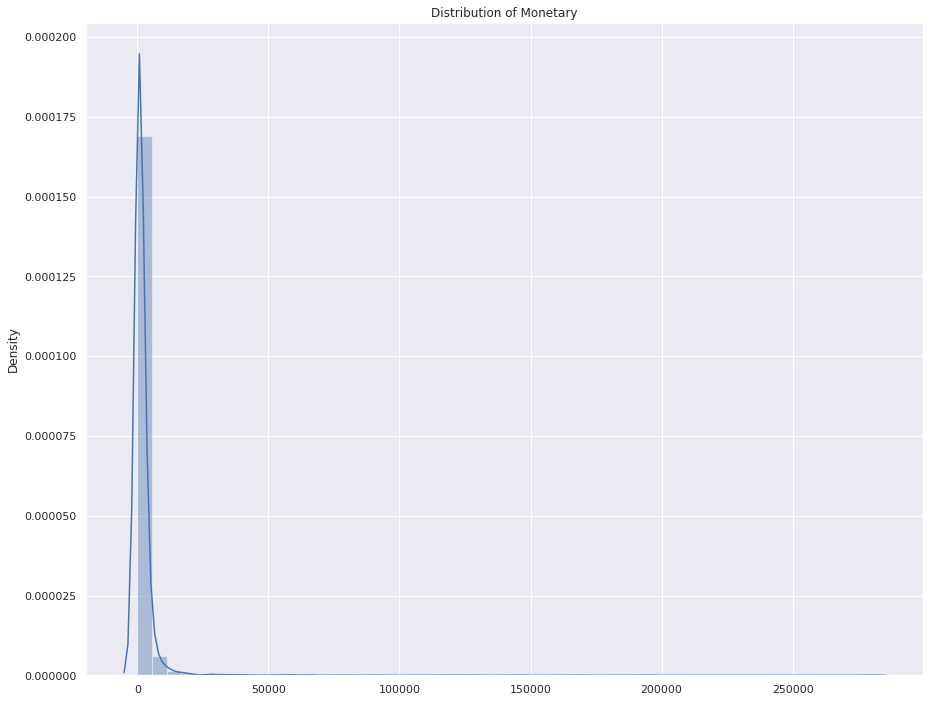

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Distribution of Monetary')
sns.distplot(x=rfm_df['Monetary'],color='B')

**We can see a positively skewed distribution for Monetary. Most of the customers have a monetary value b/w 500 to 2000.**

## **Dividing Recency, Frequency and Monetary into 4 Intervals**

In [ ]:
pd.qcut(rfm_df.Recency,q=4).head(10)

CustomerID
12346.0    (141.75, 373.0]
12347.0     (-0.001, 17.0]
12348.0     (50.0, 141.75]
12349.0       (17.0, 50.0]
12350.0    (141.75, 373.0]
12352.0       (17.0, 50.0]
12353.0    (141.75, 373.0]
12354.0    (141.75, 373.0]
12355.0    (141.75, 373.0]
12356.0       (17.0, 50.0]
Name: Recency, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 17.0] < (17.0, 50.0] < (50.0, 141.75] <
                                           (141.75, 373.0]]

**4 Intervals for Recency column are - [(-0.001, 17.0] < (17.0, 50.0] < (50.0, 141.75] < (141.75, 373.0]]**

In [ ]:
pd.qcut(rfm_df.Frequency,q=4).head(10)

CustomerID
12346.0     (0.999, 17.0]
12347.0    (98.0, 7676.0]
12348.0      (17.0, 41.0]
12349.0      (41.0, 98.0]
12350.0     (0.999, 17.0]
12352.0      (41.0, 98.0]
12353.0     (0.999, 17.0]
12354.0      (41.0, 98.0]
12355.0     (0.999, 17.0]
12356.0      (41.0, 98.0]
Name: Frequency, dtype: category
Categories (4, interval[float64, right]): [(0.999, 17.0] < (17.0, 41.0] < (41.0, 98.0] <
                                           (98.0, 7676.0]]

**4 Intervals for Frequency column are - [(0.999, 17.0] < (17.0, 41.0] < (41.0, 98.0] < (98.0, 7676.0]]**

In [ ]:
pd.qcut(rfm_df.Monetary,q=4).head(10)

CustomerID
12346.0    (1660.597, 280206.02]
12347.0    (1660.597, 280206.02]
12348.0    (1660.597, 280206.02]
12349.0    (1660.597, 280206.02]
12350.0        (306.482, 668.57]
12352.0    (1660.597, 280206.02]
12353.0         (3.749, 306.482]
12354.0       (668.57, 1660.597]
12355.0        (306.482, 668.57]
12356.0    (1660.597, 280206.02]
Name: Monetary, dtype: category
Categories (4, interval[float64, right]): [(3.749, 306.482] < (306.482, 668.57] < (668.57, 1660.597] <
                                           (1660.597, 280206.02]]

**4 Intervals for Monetary column are - [(3.749, 306.482] < (306.482, 668.57] < (668.57, 1660.597] < (1660.597, 280206.02]]**

## **Generating Recency, Frequency and Monetary Score**

**4 Intervals for Recency column - [(-0.001, 17.0] < (17.0, 50.0] < (50.0, 141.75] < (141.75, 373.0]] are given the labels of 4 to 1 respectively.**

**4 Intervals for Frequency column - [(0.999, 17.0] < (17.0, 41.0] < (41.0, 98.0] < (98.0, 7676.0]] are given the labels of 1 to 4 respectively.**

**4 Intervals for Monetary column - [(3.749, 306.482] < (306.482, 668.57] < (668.57, 1660.597] < (1660.597, 280206.02]] are given the labels of 1 to 4 respectively.**

**So the best customer will be having 4 as the label for each recency, frequency and monetary.**

In [ ]:
rfm_df['Recency Score']=pd.qcut(rfm_df.Recency,q=4,labels=[4,3,2,1])
rfm_df['Frequency Score']=pd.qcut(rfm_df.Frequency,q=4,labels=[1,2,3,4])
rfm_df['Monetary Score']=pd.qcut(rfm_df.Monetary,q=4,labels=[1,2,3,4])
rfm_df.head(10)

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,18,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
12352.0,36,85,2506.04,3,3,4
12353.0,204,4,89.00,1,1,1
12354.0,232,58,1079.40,1,3,3
12355.0,214,13,459.40,1,1,2


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          4338 non-null   int64   
 1   Frequency        4338 non-null   int64   
 2   Monetary         4338 non-null   float64 
 3   Recency Score    4338 non-null   category
 4   Frequency Score  4338 non-null   category
 5   Monetary Score   4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.9 KB


In [ ]:
rfm_df['Recency Score']=pd.to_numeric(rfm_df['Recency Score'],errors='coerce')
rfm_df['Frequency Score']=pd.to_numeric(rfm_df['Frequency Score'],errors='coerce')
rfm_df['Monetary Score']=pd.to_numeric(rfm_df['Monetary Score'],errors='coerce')

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          4338 non-null   int64  
 1   Frequency        4338 non-null   int64  
 2   Monetary         4338 non-null   float64
 3   Recency Score    4338 non-null   int64  
 4   Frequency Score  4338 non-null   int64  
 5   Monetary Score   4338 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 237.2 KB


## **Generating Customer Score**

**Customer Score of a customer is the sum of his recency, frequency and monetary score. Best customer will be having the score of 12 (4+4+4).**

In [ ]:
rfm_df['Customer Score']=rfm_df['Recency Score'] + rfm_df['Frequency Score'] + rfm_df['Monetary Score']
rfm_df.head(10)

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,Customer Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,18,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
12352.0,36,85,2506.04,3,3,4,10
12353.0,204,4,89.00,1,1,1,3
12354.0,232,58,1079.40,1,3,3,7
12355.0,214,13,459.40,1,1,2,4


## **Summary statistics for Customer score.**

In [ ]:
rfm_df['Customer Score'].describe()

count    4338.000000
mean        7.493776
std         2.814712
min         3.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: Customer Score, dtype: float64

**Minimum customer score is 3 (High recency, low frequency and low monetary value)**

**Maximum customer score is 12 (Low recency, high frequency and high monetary value)**

**Average customer score is 7.**

In [ ]:
customer_score=rfm_df['Customer Score'].value_counts().sort_values().reset_index()
customer_score.rename(columns={'index':'Customer score','Customer Score':'Count'},inplace=True)
customer_score

,Customer score,Count
0,3,381
1,11,390
2,4,391
3,9,410
4,10,428
5,12,443
6,7,456
7,8,459
8,6,461
9,5,519


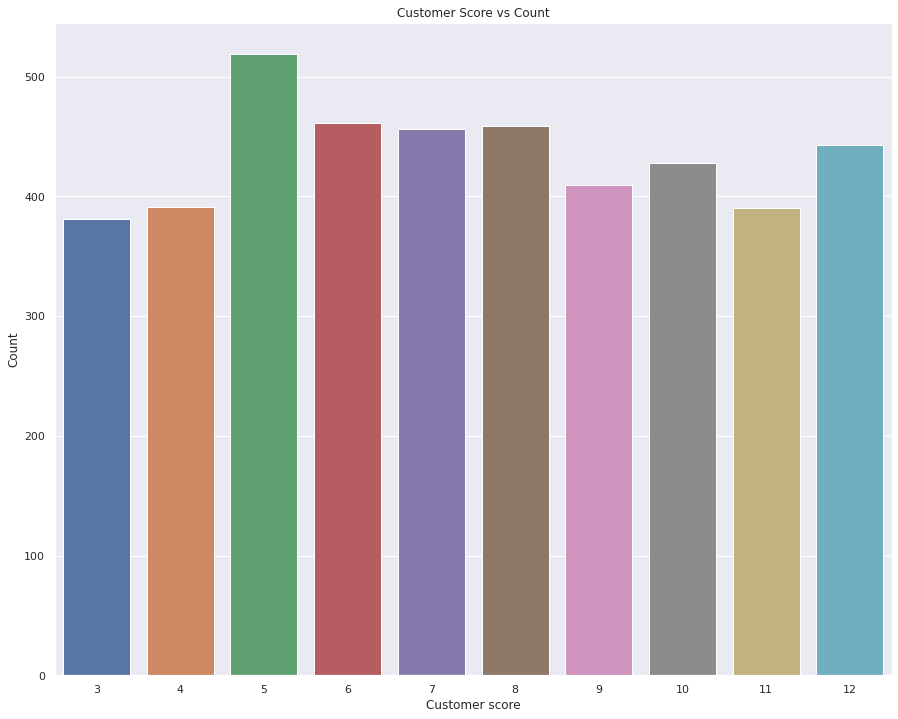

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Customer Score vs Count')
sns.barplot(x='Customer score',y='Count',data=customer_score)

**We can divide the customers into 3 groups based on their customer score-**

**Group I - Customers having a score in the interval [3,6]**

**Group II - Customers having a score in the interval [7,9].**

**Group III - Customers having a score in the interval [10,12].**

**The focus should be on Group III and Group II. Customers belonging to these 2 groups should be offered some discounts and incentives.**

##**Log Transformed plots of Recency, Frequency and Monetary**

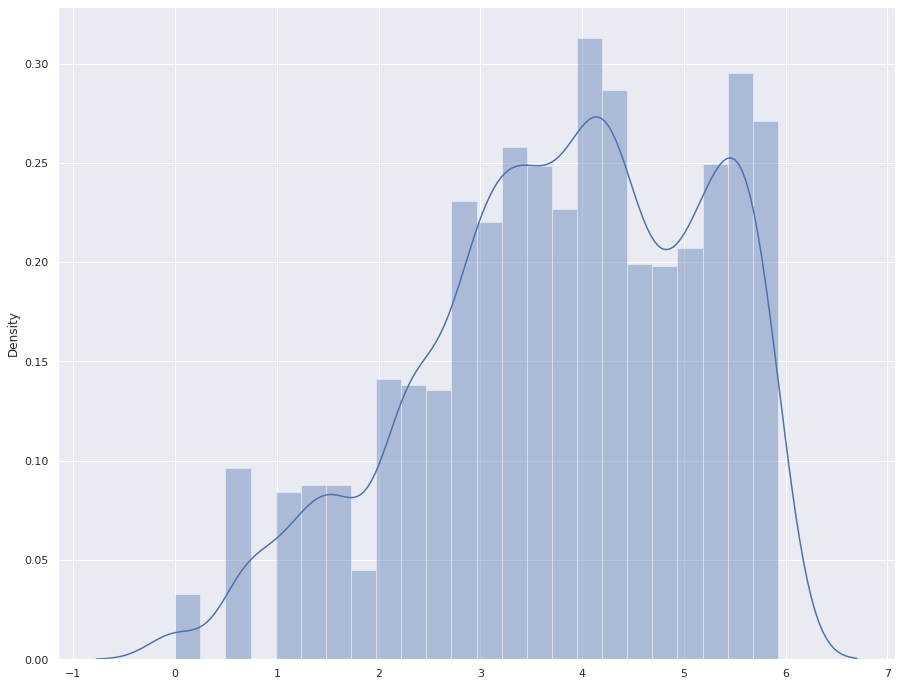

In [ ]:
plt.figure(figsize=(15,12))
sns.distplot(x=np.log(rfm_df['Recency']+1), color='B')

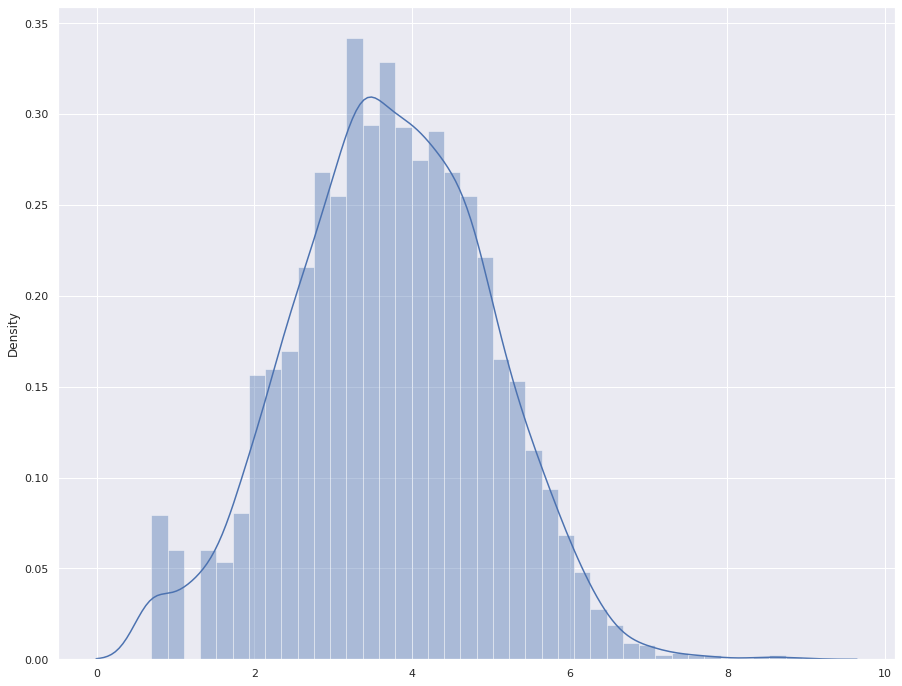

In [ ]:
plt.figure(figsize=(15,12))
sns.distplot(x=np.log(rfm_df['Frequency']+1),color='B')

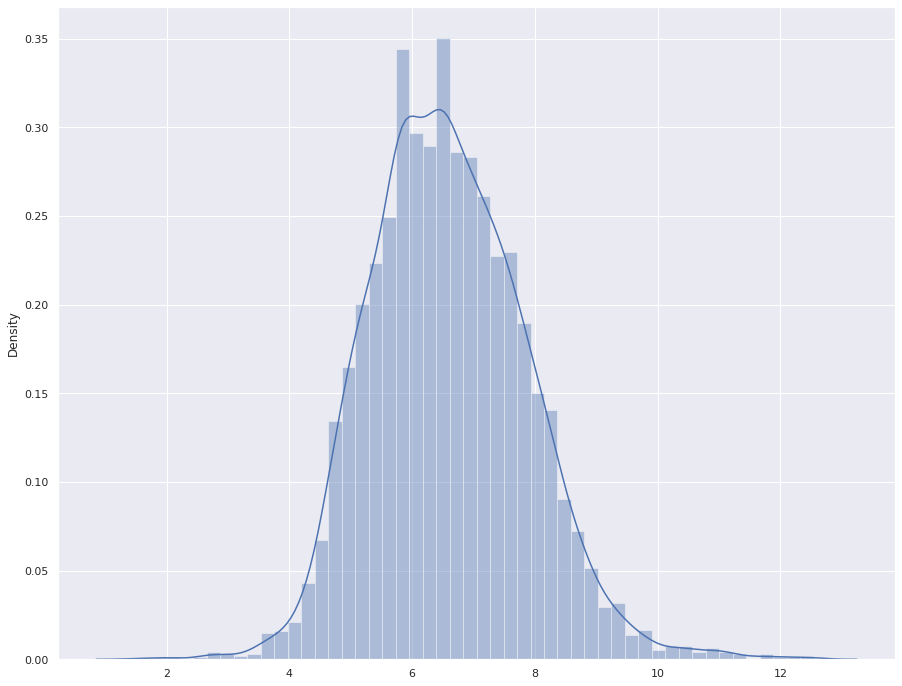

In [ ]:
plt.figure(figsize=(15,12))
sns.distplot(x=np.log(rfm_df['Monetary']+1),color='B')

In [ ]:
rfm_df['Recency']=rfm_df['Recency']+1
rfm_df['Frequency']=rfm_df['Frequency']+1
rfm_df['Monetary']=rfm_df['Monetary']+1

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#**K Means Clustering**

##**K Means on Recency and Frequency**

In [ ]:
X_Features = ['Recency_log','Frequency_log']
X_Features_rec_fre = rfm_df[X_Features].values
sc=preprocessing.StandardScaler()
X_Scaled_Features_rec_fre=sc.fit_transform(X_Features_rec_fre)

**Silhouette Score Method on Recency and Frequency**

For n_clusters = 2 The average silhouette_score is : 0.42605731249055223
For n_clusters = 3 The average silhouette_score is : 0.33749432240286587
For n_clusters = 4 The average silhouette_score is : 0.35350852338940336
For n_clusters = 5 The average silhouette_score is : 0.340905839700074
For n_clusters = 6 The average silhouette_score is : 0.3437373227718307
For n_clusters = 7 The average silhouette_score is : 0.3332651804038031
For n_clusters = 8 The average silhouette_score is : 0.34325060494221055
For n_clusters = 9 The average silhouette_score is : 0.34208126083311363
For n_clusters = 10 The average silhouette_score is : 0.3380880640896967
For n_clusters = 11 The average silhouette_score is : 0.34052947487023094
For n_clusters = 12 The average silhouette_score is : 0.3461643476382622
For n_clusters = 13 The average silhouette_score is : 0.34581146055852147
For n_clusters = 14 The average silhouette_score is : 0.34845692955029045
For n_clusters = 15 The average silhouette_score is 

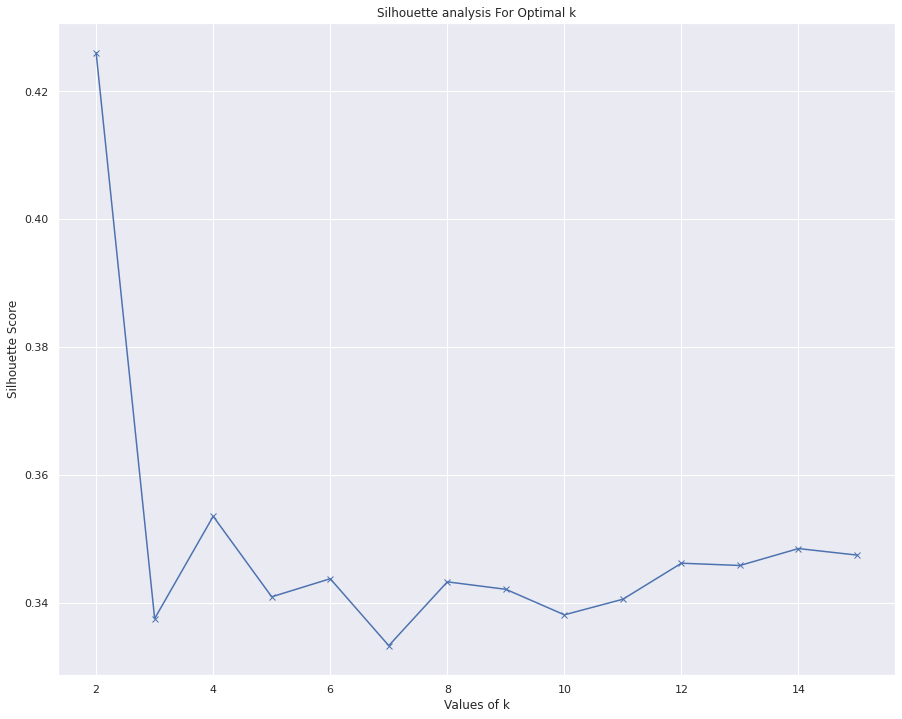

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silhouette_avg = []
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n,random_state=10)
    preds = clusterer.fit_predict(X_Scaled_Features_rec_fre)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(X_Scaled_Features_rec_fre, preds)
    print("For n_clusters =", n,
          "The average silhouette_score is :", score)
    silhouette_avg.append(score)
plt.figure(figsize=(15,12))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of k') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

**From the Silhouette score method we can see that K=2 has the highest silhouette score and hence we can consider k=4 to cluster the customers based only on Recency and Frequency.**

**Elbow Method on Recency and Frequency**

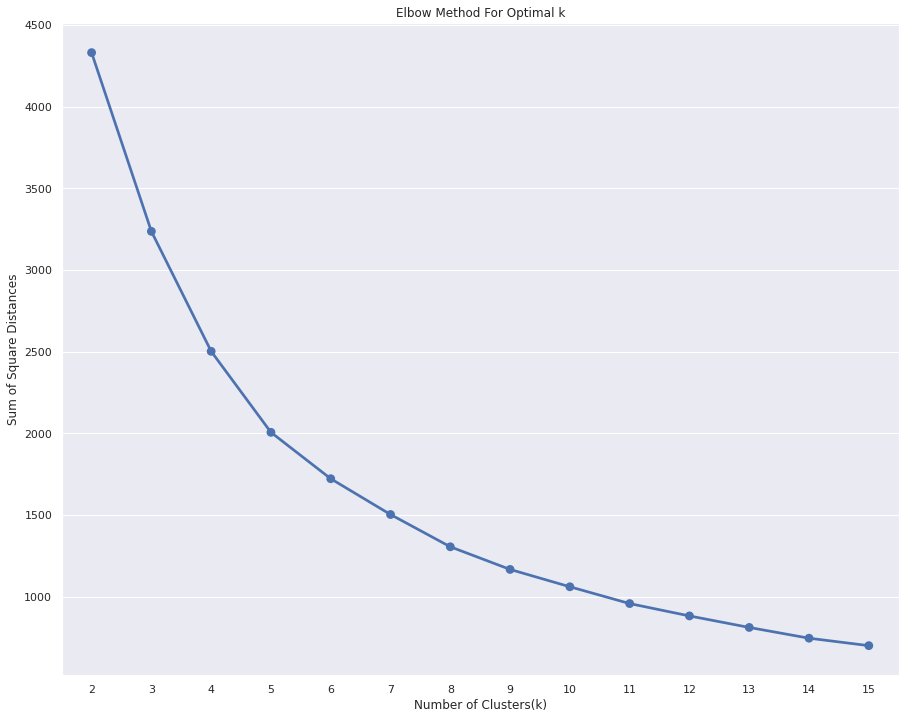

In [ ]:
SSD = {}
for k in range_n_clusters:
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state=10)
    km = km.fit(X_Scaled_Features_rec_fre)
    SSD[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,12))
sns.pointplot(x = list(SSD.keys()), y = list(SSD.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the elbow method we can see there is a sharp fall of average distance at k = 2,3 and 4. We will take k=2 since it has the highest Silhouette score as well**

## **K Means on Recency and Monetary**

**Silhouette Score Method on Recency and Monetary**

In [ ]:
Y_Features = ['Recency_log','Monetary_log']
Y_Features_rec_mon = rfm_df[Y_Features].values
sc=preprocessing.StandardScaler()
Y_Scaled_Features_rec_mon=sc.fit_transform(Y_Features_rec_mon)

For n_clusters = 2 The average silhouette_score is : 0.41997600222029213
For n_clusters = 3 The average silhouette_score is : 0.3398911487378344
For n_clusters = 4 The average silhouette_score is : 0.36416771242426693
For n_clusters = 5 The average silhouette_score is : 0.33366318576137005
For n_clusters = 6 The average silhouette_score is : 0.34297853676462436
For n_clusters = 7 The average silhouette_score is : 0.3376282410718
For n_clusters = 8 The average silhouette_score is : 0.336047666561843
For n_clusters = 9 The average silhouette_score is : 0.3463565430573895
For n_clusters = 10 The average silhouette_score is : 0.3472302855021163
For n_clusters = 11 The average silhouette_score is : 0.33787014433303214
For n_clusters = 12 The average silhouette_score is : 0.34557781569175094
For n_clusters = 13 The average silhouette_score is : 0.33664096027626655
For n_clusters = 14 The average silhouette_score is : 0.34224140343292875
For n_clusters = 15 The average silhouette_score is : 0

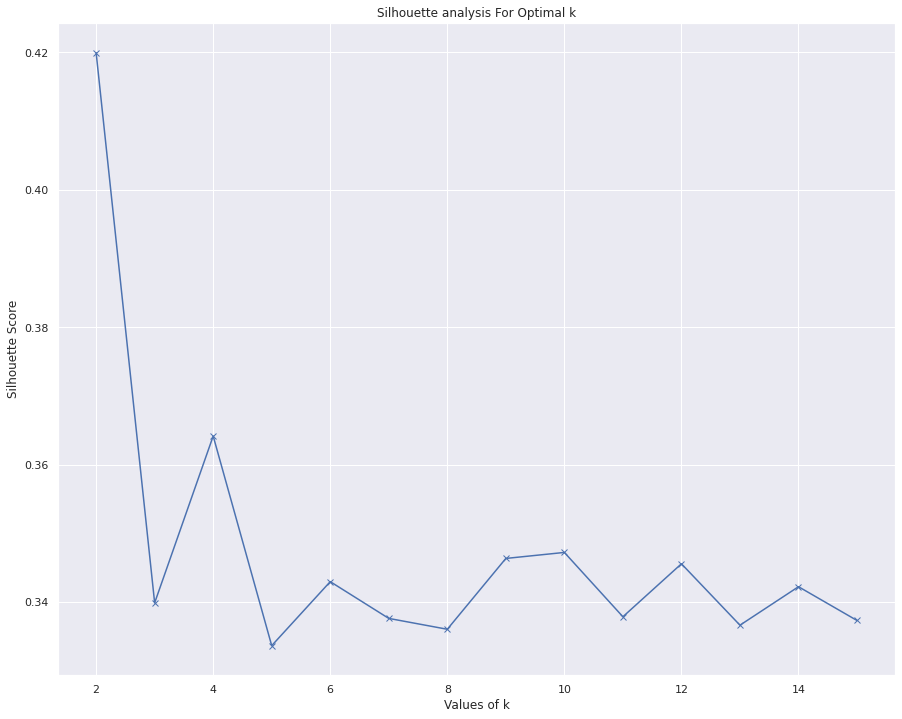

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silhouette_avg1=[]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n,random_state=10)
    preds = clusterer.fit_predict(Y_Scaled_Features_rec_mon)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(Y_Scaled_Features_rec_mon, preds)
    print("For n_clusters =", n,
          "The average silhouette_score is :", score)
    silhouette_avg1.append(score)
plt.figure(figsize=(15,12))
plt.plot(range_n_clusters,silhouette_avg1,'bx-')
plt.xlabel('Values of k') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

**From the Silhouette score method we can see that K=2 has the highest silhouette score and hence we can consider k=2 to cluster the customers based only on Recency and Monetary.**

**Elbow Method on Recency and Frequency**

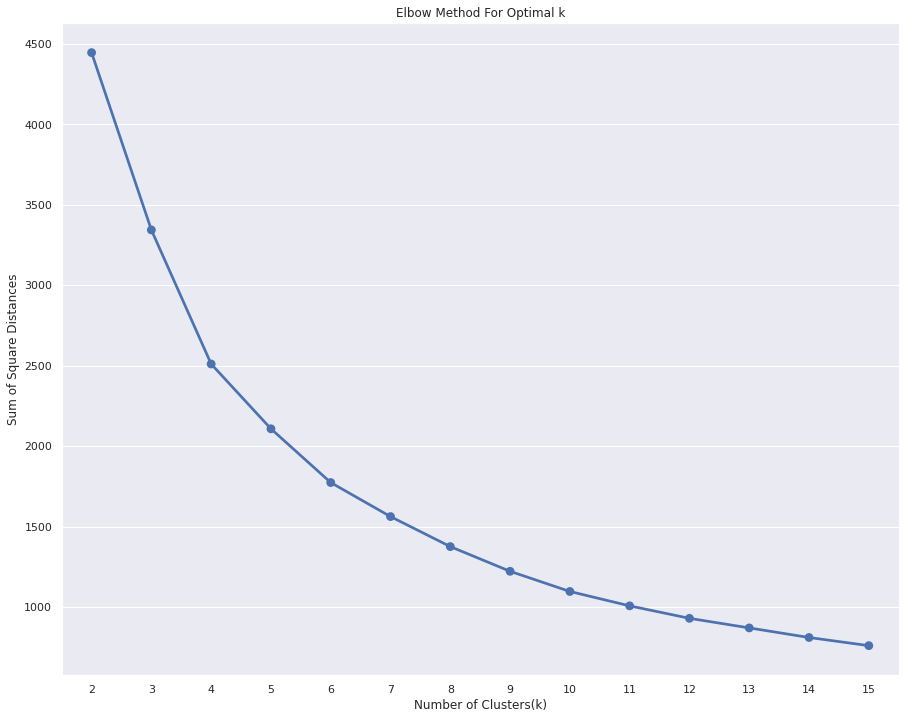

In [ ]:
SSD = {}
for k in range_n_clusters:
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state=10)
    km = km.fit(Y_Scaled_Features_rec_mon)
    SSD[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,12))
sns.pointplot(x = list(SSD.keys()), y = list(SSD.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the elbow method we can see there is a sharp fall of average distance at k = 2, 3 and 4. We will take k=2 since it has the highest Silhouette score as well.**

## **K Means on Frequency and Monetary**

**Silhouette Score Method on Frequency and Monetary**

In [ ]:
Z_Features = ['Frequency_log','Monetary_log']
Z_Features_fre_mon = rfm_df[Z_Features].values
sc=preprocessing.StandardScaler()
Z_Scaled_Features_fre_mon=sc.fit_transform(Z_Features_fre_mon)

For n_clusters = 2 The average silhouette_score is : 0.48365714549239636
For n_clusters = 3 The average silhouette_score is : 0.41074628385326095
For n_clusters = 4 The average silhouette_score is : 0.37012104693074493
For n_clusters = 5 The average silhouette_score is : 0.34300537440534873
For n_clusters = 6 The average silhouette_score is : 0.36100656268220643
For n_clusters = 7 The average silhouette_score is : 0.3323547604682825
For n_clusters = 8 The average silhouette_score is : 0.34120721490979405
For n_clusters = 9 The average silhouette_score is : 0.3400978340149458
For n_clusters = 10 The average silhouette_score is : 0.35373515381122717
For n_clusters = 11 The average silhouette_score is : 0.367415820364824
For n_clusters = 12 The average silhouette_score is : 0.35121818605125416
For n_clusters = 13 The average silhouette_score is : 0.3520347287895159
For n_clusters = 14 The average silhouette_score is : 0.3592969450014769
For n_clusters = 15 The average silhouette_score is 

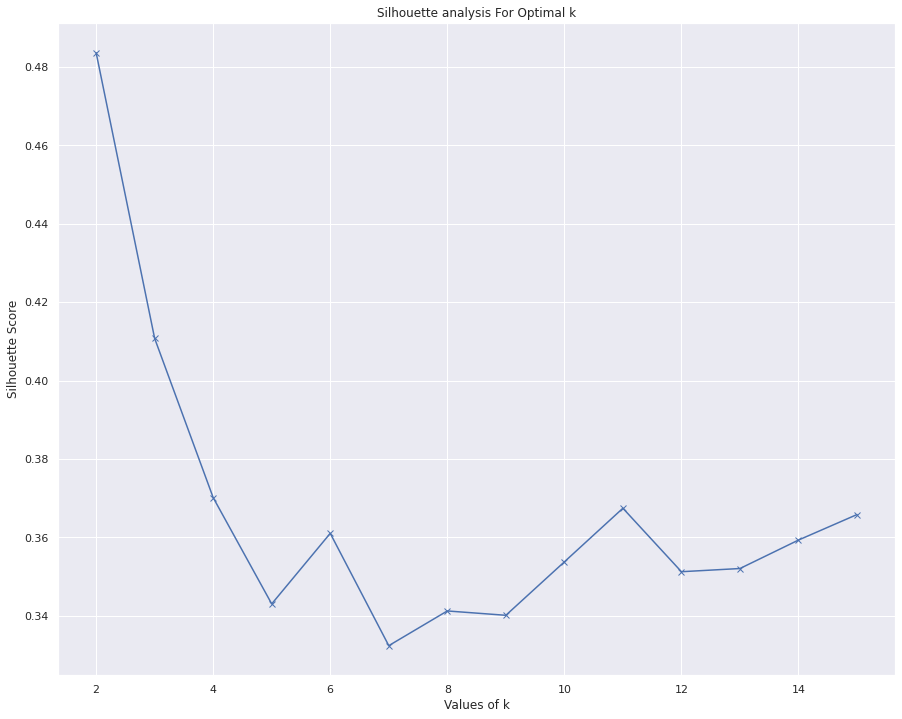

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silhouette_avg2=[]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n,random_state=10)
    preds = clusterer.fit_predict(Z_Scaled_Features_fre_mon)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(Z_Scaled_Features_fre_mon, preds)
    print("For n_clusters =", n,
          "The average silhouette_score is :", score)
    silhouette_avg2.append(score)
plt.figure(figsize=(15,12))
plt.plot(range_n_clusters,silhouette_avg2,'bx-')
plt.xlabel('Values of k') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

**From the Silhouette score method we can see that K=2 has the highest silhouette score and hence we can consider k=2 to cluster the customers based only on Frequency and Monetary.**

**Elbow Method on Monetary and Frequency**

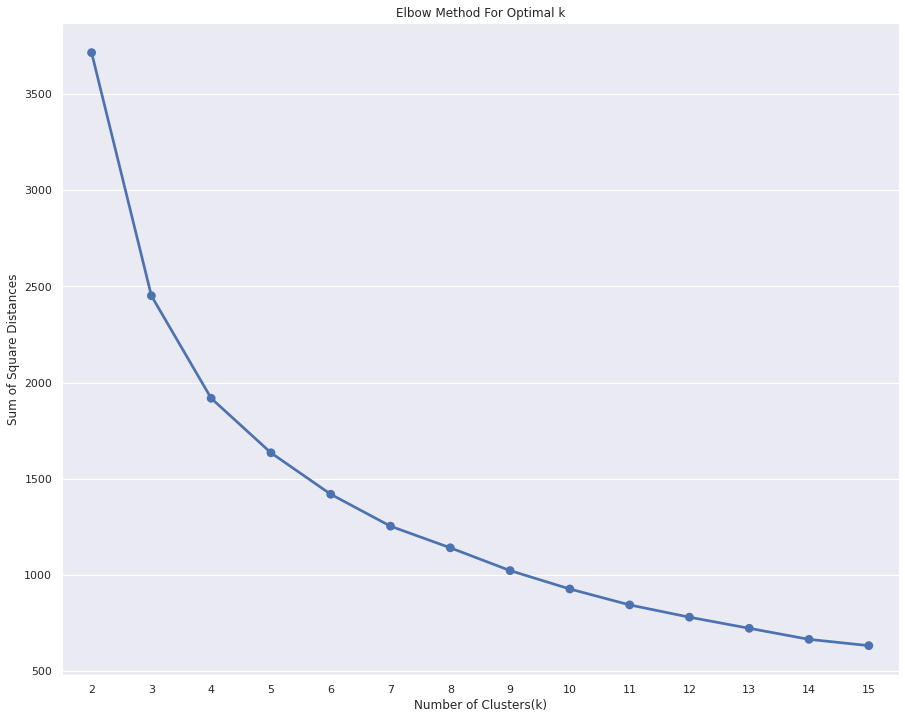

In [ ]:
SSD = {}
for k in range_n_clusters:
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state=10)
    km = km.fit(Z_Scaled_Features_fre_mon)
    SSD[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,12))
sns.pointplot(x = list(SSD.keys()), y = list(SSD.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the elbow method we can see there is a sharp fall of average distance at k = 2, 3 and 4. We will take k=2 since it has the highest Silhouette score as well.**

## **K Means on Recency, Frequency and Monetary**

**Silhouette Score Method on Recency, Frequency and Monetary.**

In [ ]:
RFM_Features = ['Recency_log','Frequency_log','Monetary_log']
RFM_Features_rec_fre_mon = rfm_df[RFM_Features].values
sc=preprocessing.StandardScaler()
RFM_Scaled_Features_rec_fre_mon=sc.fit_transform(RFM_Features_rec_fre_mon)

For n_clusters = 2 The average silhouette_score is : 0.3999968034262332
For n_clusters = 3 The average silhouette_score is : 0.3060771455065488
For n_clusters = 4 The average silhouette_score is : 0.3072210535535764
For n_clusters = 5 The average silhouette_score is : 0.2759099433740278
For n_clusters = 6 The average silhouette_score is : 0.27378779232617917
For n_clusters = 7 The average silhouette_score is : 0.2628159389585641
For n_clusters = 8 The average silhouette_score is : 0.25976250801890166
For n_clusters = 9 The average silhouette_score is : 0.2577704584457943
For n_clusters = 10 The average silhouette_score is : 0.2583281610126214
For n_clusters = 11 The average silhouette_score is : 0.26770352639157907
For n_clusters = 12 The average silhouette_score is : 0.26560517233690606
For n_clusters = 13 The average silhouette_score is : 0.256670921819808
For n_clusters = 14 The average silhouette_score is : 0.2487000299225344
For n_clusters = 15 The average silhouette_score is : 0.

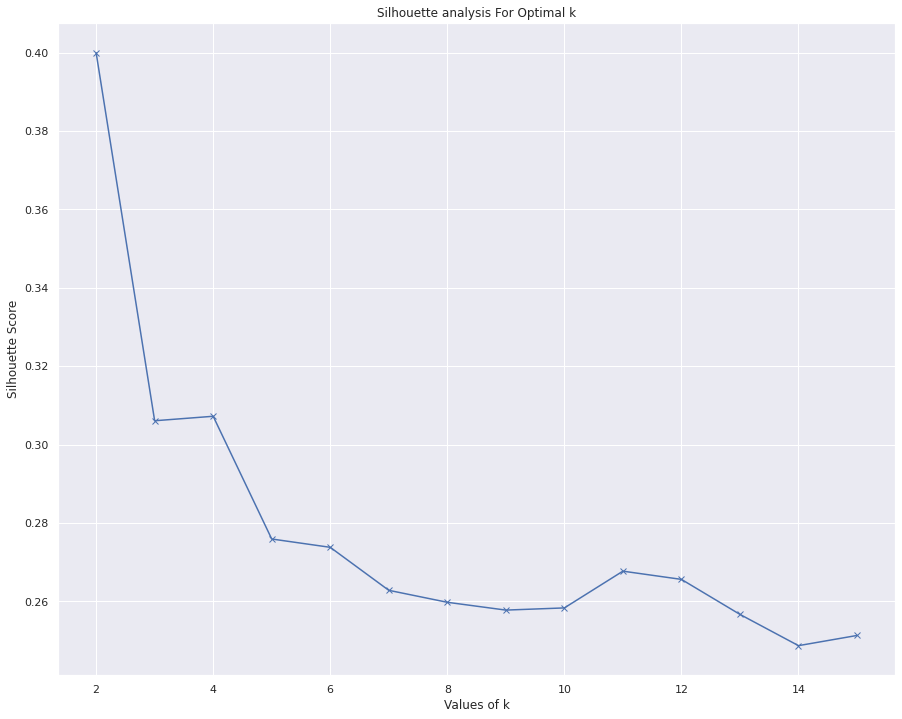

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silhouette_avg3=[]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n,random_state=10)
    preds = clusterer.fit_predict(RFM_Scaled_Features_rec_fre_mon)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(RFM_Scaled_Features_rec_fre_mon, preds)
    print("For n_clusters =", n,
          "The average silhouette_score is :", score)
    silhouette_avg3.append(score)
plt.figure(figsize=(15,12))
plt.plot(range_n_clusters,silhouette_avg3,'bx-')
plt.xlabel('Values of k') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

**From the Silhouette score method we can see that K=2 has the highest silhouette score and hence we can consider k=2 to cluster the customers based only on Recency, Frequency and Monetary.**

**Elbow Method on Recency ,Frequency and Monetary**

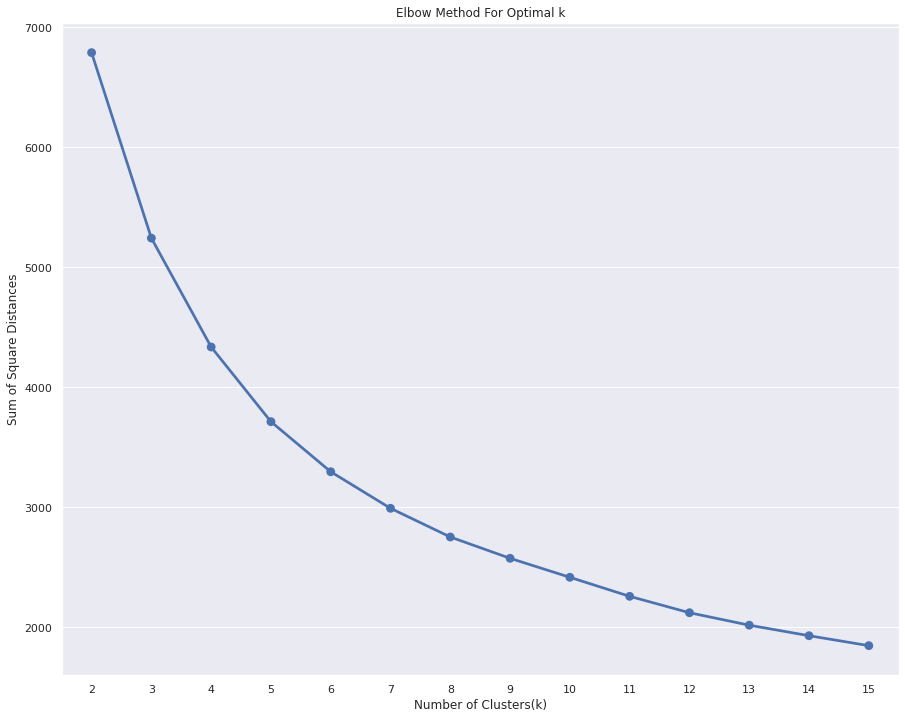

In [ ]:
SSD = {}
for k in range_n_clusters:
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state=10)
    km = km.fit(RFM_Scaled_Features_rec_fre_mon)
    SSD[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,12))
sns.pointplot(x = list(SSD.keys()), y = list(SSD.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the elbow method we can see there is a sharp fall of average distance at k = 2, 3 and 4. We will take k=2 since it has the highest Silhouette score as well.**

## **Hierarchial Clustering**

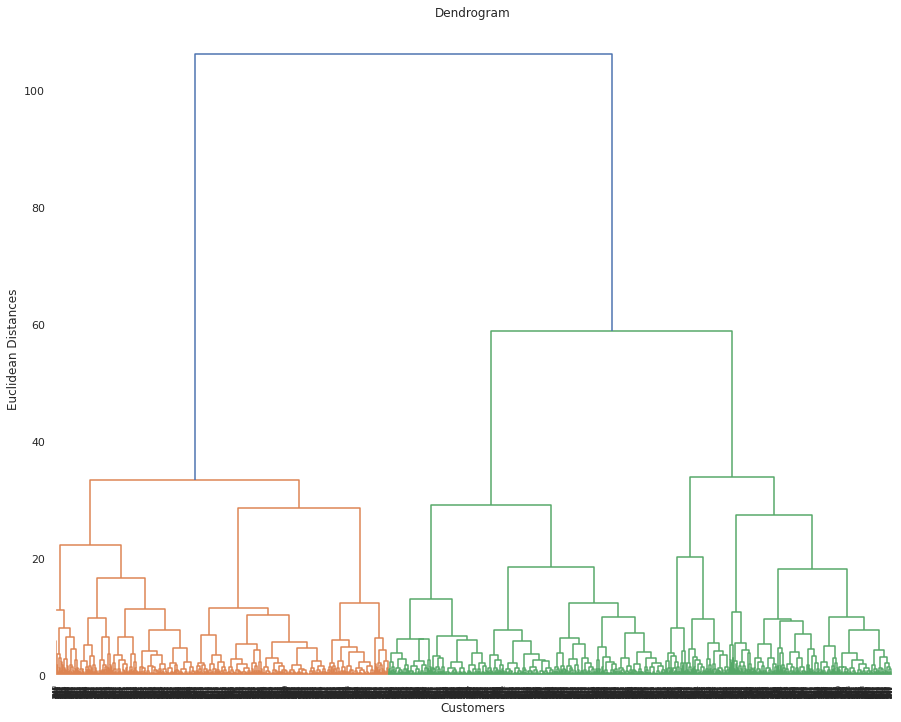

In [ ]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(15,12))
dendrogram = sch.dendrogram(sch.linkage(RFM_Scaled_Features_rec_fre_mon, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

**Largest vertical distance we can make without crossing any other horizontal line is at 80 which will give the number of clusters k as 2**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_hc=cluster.fit_predict(RFM_Scaled_Features_rec_fre_mon)
rfm_df['Cluster']=y_hc

In [ ]:
rfm_df.head(10)

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,Customer Score,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,
12346.0,326,2,77184.60,1,1,4,6,5.786897,0.693147,11.253955,1
12347.0,3,183,4311.00,4,4,4,12,1.098612,5.209486,8.368925,0
12348.0,76,32,1798.24,2,2,4,8,4.330733,3.465736,7.494564,0
12349.0,19,74,1758.55,3,3,4,10,2.944439,4.304065,7.472245,0
12350.0,311,18,335.40,1,1,2,4,5.739793,2.890372,5.815324,1
12352.0,37,86,2507.04,3,3,4,10,3.610918,4.454347,7.826858,0
12353.0,205,5,90.00,1,1,1,3,5.323010,1.609438,4.499810,1
12354.0,233,59,1080.40,1,3,3,7,5.451038,4.077537,6.985087,0
12355.0,215,14,460.40,1,1,2,4,5.370638,2.639057,6.132096,1


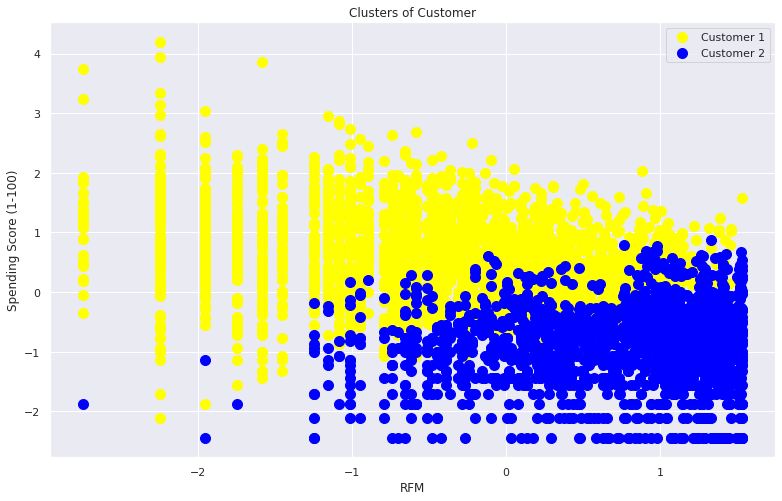

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(RFM_Scaled_Features_rec_fre_mon[y_hc == 0, 0], RFM_Scaled_Features_rec_fre_mon[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Customer 1')
plt.scatter(RFM_Scaled_Features_rec_fre_mon[y_hc == 1, 0], RFM_Scaled_Features_rec_fre_mon[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Summary**

In [ ]:

from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['4',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['5',"K-Means with silhouette_score ", "RF", "2"]) 
myTable.add_row(['6',"K-Means with Elbow methos  ", "RF", "2"])
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    | K-Means with silhouette_score  |  FM  |             2             |
|   4    |  K-Means with Elbow methos     |  FM  |             2             |
|   5    | K-Means with silhouette_score  |  RF  |             2             |
|   6    |  K-Means with Elbow methos     |  RF  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
+--------+--------------------------------+------+--

**By applying different clustering algorithem to our dataset. We get the optimal number of cluster is equal to 2**

## **Conclusions**

**1) The dataset's highest and lowest occurrences are Saudi Arabia and the United Kingdom.**

**2) November has the biggest sales. Similar to weekends, Thursdays are the busiest shopping days.**

**3) We need to start activating discounts and special incentives on Thursdays and Wednesdays from 11 AM to 4 PM because these are the days when sales are at their highest.**

**4) Paper Craft, Little Birdie is the most utilised item.**

**5) White Hanging Heart T-Light Holder is the most purchased item.**

**6) Consequently, we can conclude from customer segmentation that the business should concentrate on high-paying and frequent customers (Target customer).**